In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Daten laden
file_path = "ebay_iphone_prices.csv"
data = pd.read_csv(file_path)

# Um sicherzustellen, dass das Datum richtig erkannt wird
data['Date'] = pd.to_datetime(data['Date'])

# Durchschnittliche iPhone-Preise
average_prices = data.groupby('Date')['Price'].mean()

# Dunkler Plot-Stil
sns.set(style='darkgrid')  # Hier verwenden wir 'darkgrid', der eine dunklere Farbpalette bietet

In [19]:
print(data.isnull().sum())
print(data.describe().round(2))
print(data['Date'].value_counts())
print(data['Sale_Format'].value_counts())

web-scraper-order        0
web-scraper-start-url    0
Listing                  0
Price                    0
Sale_Format              0
Shipping_Cost            0
Shipping_percent         0
Shipping                 0
Total sold               0
Item_Revenue             0
Bids                     0
Date                     0
dtype: int64
          Price  Shipping_Cost  Shipping_percent  Total sold  Item_Revenue  \
count  81272.00       81272.00          81272.00    81272.00      81272.00   
mean     644.26           3.74              0.41        4.90       3784.48   
min      150.10           0.00              0.00        1.00        150.01   
25%      364.63           0.00              0.00        1.00        374.69   
50%      573.68           5.51              0.00        1.00        626.21   
75%      865.62           5.96              1.00        1.00       1037.38   
max     2000.00         430.82              1.00     4923.00    4035679.65   
std      358.10           3.91         

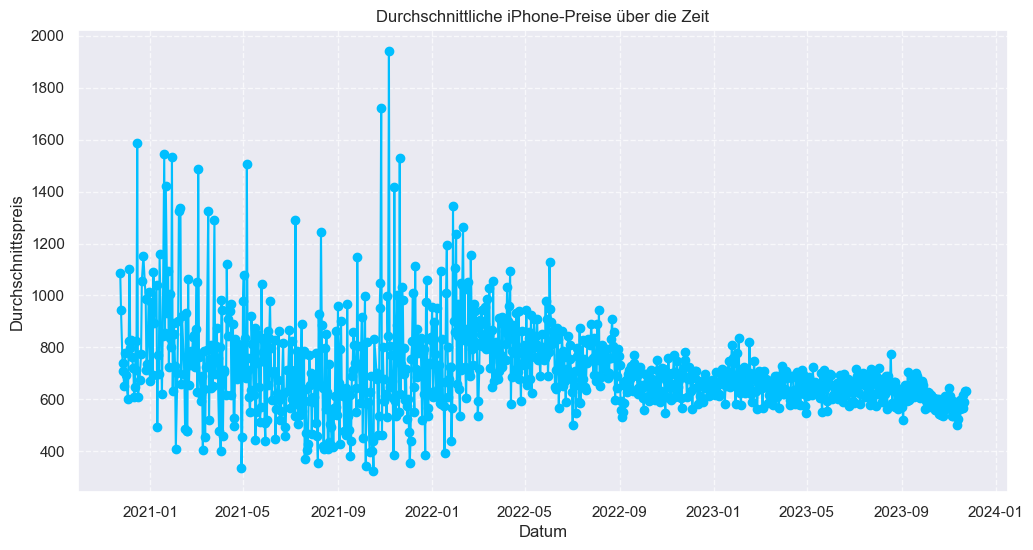

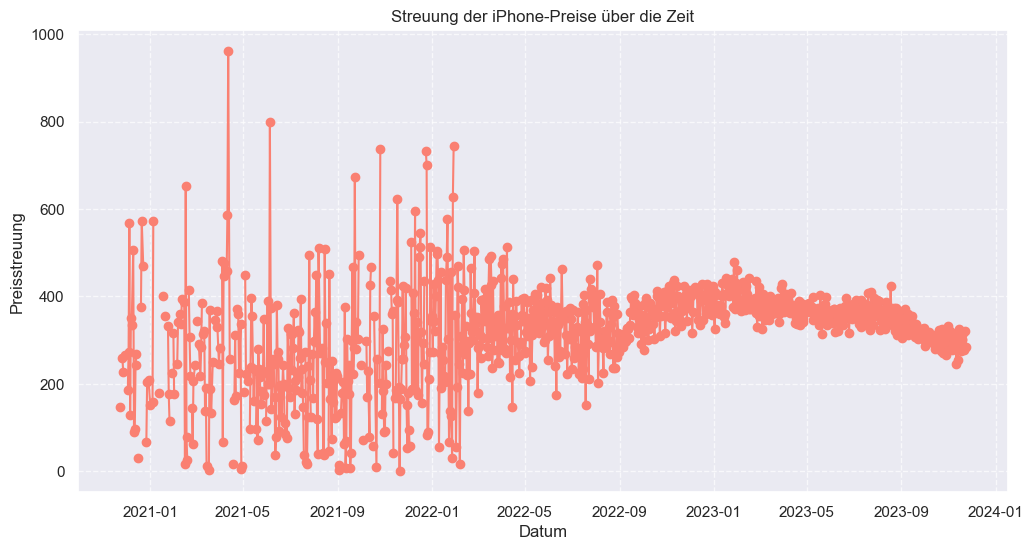

In [20]:

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(average_prices, marker='o', linestyle='-', color='deepskyblue')  # Farbe angepasst

# Achsentitel und Titel hinzufügen
plt.xlabel('Datum')
plt.ylabel('Durchschnittspreis')
plt.title('Durchschnittliche iPhone-Preise über die Zeit')

# Raster hinzufügen
plt.grid(True, linestyle='--', alpha=0.7)  # Gitterlinien angepasst

# Plot anzeigen oder speichern
plt.show()
# ODER speichern Sie den Plot in einer Datei mit plt.savefig('durchschnittliche_preise_verlauf.png')

# Standardabweichungen und Streuungen der iPhone-Preise
price_variability = data.groupby('Date')['Price'].std()

# Plot für Standardabweichungen und Streuungen erstellen
plt.figure(figsize=(12, 6))
plt.plot(price_variability, marker='o', linestyle='-', color='salmon')  # Farbe angepasst

# Achsentitel und Titel hinzufügen
plt.xlabel('Datum')
plt.ylabel('Preisstreuung')
plt.title('Streuung der iPhone-Preise über die Zeit')

# Raster hinzufügen
plt.grid(True, linestyle='--', alpha=0.7)  # Gitterlinien angepasst

# Plot anzeigen oder speichern
plt.show()
# ODER speichern Sie den Plot in einer Datei mit plt.savefig('preis_varianz_verlauf.png')


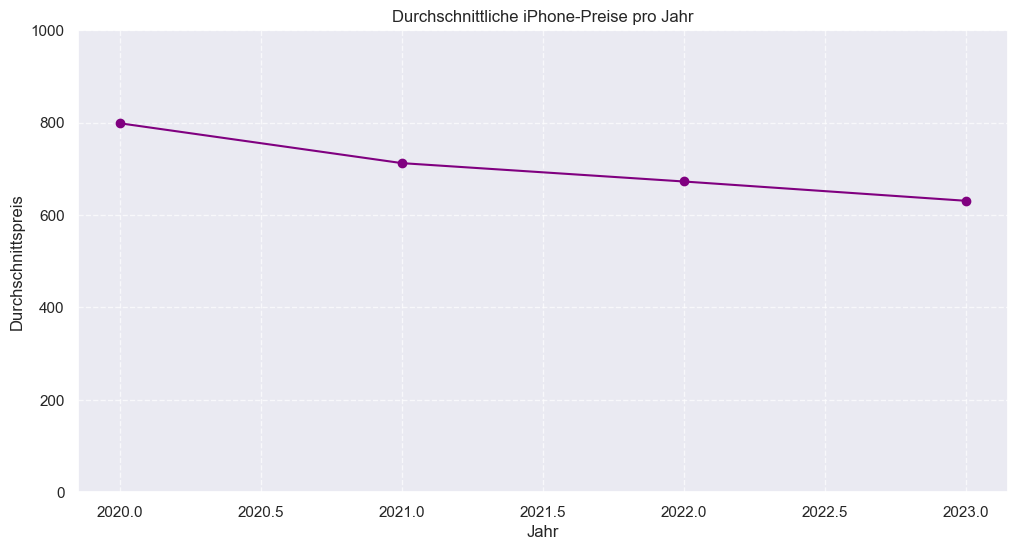

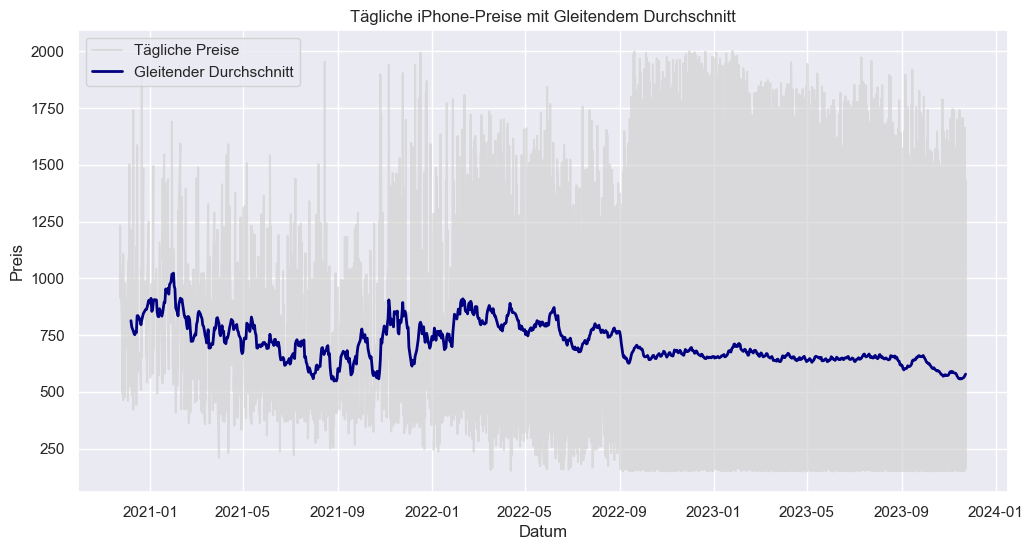

In [21]:
# Durchschnittliche Preise pro Jahr berechnen
average_prices_yearly = data.groupby(data['Date'].dt.year)['Price'].mean()

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(average_prices_yearly, marker='o', linestyle='-', color='purple')  # Farbe angepasst

# Achsentitel und Titel hinzufügen
plt.xlabel('Jahr')
plt.ylabel('Durchschnittspreis')
plt.title('Durchschnittliche iPhone-Preise pro Jahr')

# Raster hinzufügen
plt.grid(True, linestyle='--', alpha=0.7)  # Gitterlinien angepasst

# Y-Achsenlimit auf 0 bis 1000 setzen
plt.ylim(0, 1000)

# Plot anzeigen oder speichern
plt.show()


# Gleitender Durchschnitt für einen reibungsloseren Trend
rolling_average = data.groupby('Date')['Price'].mean().rolling(window=12).mean()

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Tägliche Preise', color='lightgray', alpha=0.7)
plt.plot(rolling_average, label='Gleitender Durchschnitt', linestyle='-', linewidth=2, color='navy')

# Achsentitel und Titel hinzufügen
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.title('Tägliche iPhone-Preise mit Gleitendem Durchschnitt')

# Legende hinzufügen
plt.legend()

# Plot anzeigen oder speichern
plt.show()


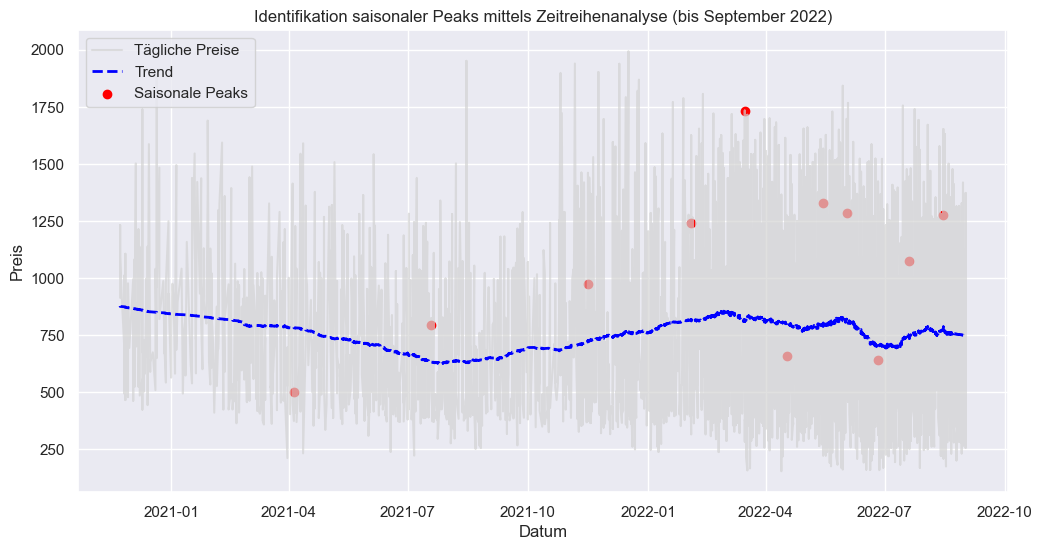

In [22]:
# Daten auf den Zeitraum von Anfang bis September 2022 begrenzen
data_subset = data[data['Date'] <= '2022-09-01']

# Zeitreihenanalyse durchführen mit extrapolierter Trendkomponente
res = sm.tsa.seasonal_decompose(data_subset['Price'], period=365, extrapolate_trend='freq')

# Spitzen der saisonalen Komponente identifizieren
peaks, _ = find_peaks(res.seasonal, height=270)  # Du kannst den Schwellenwert anpassen

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(data_subset['Date'], data_subset['Price'], label='Tägliche Preise', color='lightgray', alpha=0.7)
plt.plot(data_subset['Date'], res.trend, label='Trend', color='blue', linestyle='--', linewidth=2)
plt.scatter(data_subset.loc[peaks, 'Date'], data_subset.loc[peaks, 'Price'], marker='o', color='red', label='Saisonale Peaks')

# Achsentitel und Titel hinzufügen
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.title('Identifikation saisonaler Peaks mittels Zeitreihenanalyse (bis September 2022)')

# Legende hinzufügen
plt.legend()

# Plot anzeigen oder speichern
plt.show()

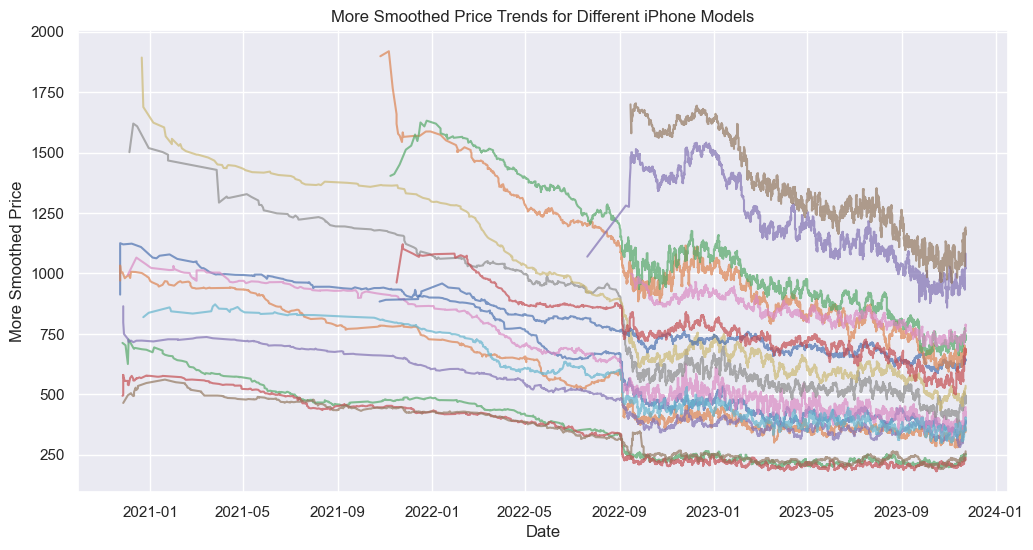

In [23]:
data['iPhone_Model'] = data['web-scraper-start-url'].str.extract(r'aspect=Modell%3A%3A%3A([^&]+)')
data['iPhone_Model'] = data['iPhone_Model'].str.replace('+', ' ')

iphone_models = data['iPhone_Model'].unique()

# Plot creation
plt.figure(figsize=(12, 6))

# For each iPhone model, plot the more smoothed price trend
for model in iphone_models:
    model_data = data[data['iPhone_Model'] == model]
    # Using a larger window size (e.g., 14) for increased smoothing
    smoothed_prices = model_data['Price'].rolling(window=50, min_periods=1).mean()
    plt.plot(model_data['Date'], smoothed_prices, label=model, alpha=0.7)

# Axis labels and title
plt.xlabel('Date')
plt.ylabel('More Smoothed Price')
plt.title('More Smoothed Price Trends for Different iPhone Models')

# Remove the legend
plt.legend().set_visible(False)

# Show or save the plot
plt.show()